## Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from matplotlib.ticker import FuncFormatter
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
Airline = pd.read_csv(r"C:\Users\hp\Desktop\My_Project\Airtraffic_Passenger_statistic\AirTraffic_Passenger_Statistics.csv")

Airline.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,GEO Region,Terminal,Boarding Area,Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,US,Terminal 1,B,27271,2005,July
1,200507,ATA Airlines,TZ,US,Terminal 1,B,29131,2005,July
2,200507,ATA Airlines,TZ,US,Terminal 1,B,5415,2005,July
3,200507,Air Canada,AC,Canada,Terminal 1,B,35156,2005,July
4,200507,Air Canada,AC,Canada,Terminal 1,B,34090,2005,July


# Data Cleaning

In [3]:
Airline.shape

(15007, 9)

In [4]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   GEO Region                   15007 non-null  object
 4   Terminal                     15007 non-null  object
 5   Boarding Area                15007 non-null  object
 6   Passenger Count              15007 non-null  int64 
 7   Year                         15007 non-null  int64 
 8   Month                        15007 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.0+ MB


In [5]:
Airline.rename(columns = {'Activity Period':'Activity_Period', 'Operating Airline':'Operating_Airline',"Operating Airline IATA Code":"Operating_Cod",
                     "GEO Region":"GEO_Region","Price Category Code":"Price_Category_Code","Boarding Area":"Boarding_Area","Passenger Count":"Passenger_Count"
                    }, inplace = True)
Airline.head()

,Activity_Period,Operating_Airline,Operating_Cod,GEO_Region,Terminal,Boarding_Area,Passenger_Count,Year,Month
0,200507,ATA Airlines,TZ,US,Terminal 1,B,27271,2005,July
1,200507,ATA Airlines,TZ,US,Terminal 1,B,29131,2005,July
2,200507,ATA Airlines,TZ,US,Terminal 1,B,5415,2005,July
3,200507,Air Canada,AC,Canada,Terminal 1,B,35156,2005,July
4,200507,Air Canada,AC,Canada,Terminal 1,B,34090,2005,July


In [6]:
Airline.duplicated().sum()

32

In [7]:
Airline = Airline.drop_duplicates()
Airline.count()

Activity_Period      14975
Operating_Airline    14975
Operating_Cod        14937
GEO_Region           14975
Terminal             14975
Boarding_Area        14975
Passenger_Count      14975
Year                 14975
Month                14975
dtype: int64

In [8]:
print(Airline.isnull().sum())

Activity_Period       0
Operating_Airline     0
Operating_Cod        38
GEO_Region            0
Terminal              0
Boarding_Area         0
Passenger_Count       0
Year                  0
Month                 0
dtype: int64


In [9]:
Airline = Airline.dropna()    # Dropping the missing values.

In [10]:
Airline.isnull().sum()

Activity_Period      0
Operating_Airline    0
Operating_Cod        0
GEO_Region           0
Terminal             0
Boarding_Area        0
Passenger_Count      0
Year                 0
Month                0
dtype: int64

Activity_Period       Axes(0.125,0.11;0.227941x0.77)
Passenger_Count    Axes(0.398529,0.11;0.227941x0.77)
Year               Axes(0.672059,0.11;0.227941x0.77)
dtype: object

<Figure size 4000x800 with 0 Axes>

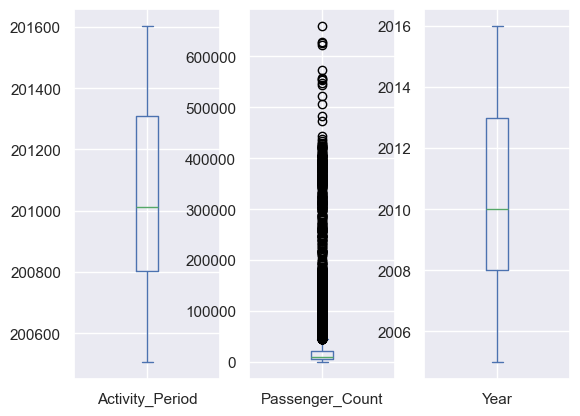

In [11]:
plt.figure(figsize = (40,8))
Airline.plot(kind = 'box', subplots = True)

In [12]:
Q1 = Airline['Passenger_Count'].quantile(0.25)
Q2 = Airline['Passenger_Count'].quantile(0.75)

IQR = Q2-Q1
IQR

15847.0

In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR
Airline = Airline[Airline['Passenger_Count'] <= 20000]

<Axes: ylabel='Passenger_Count'>

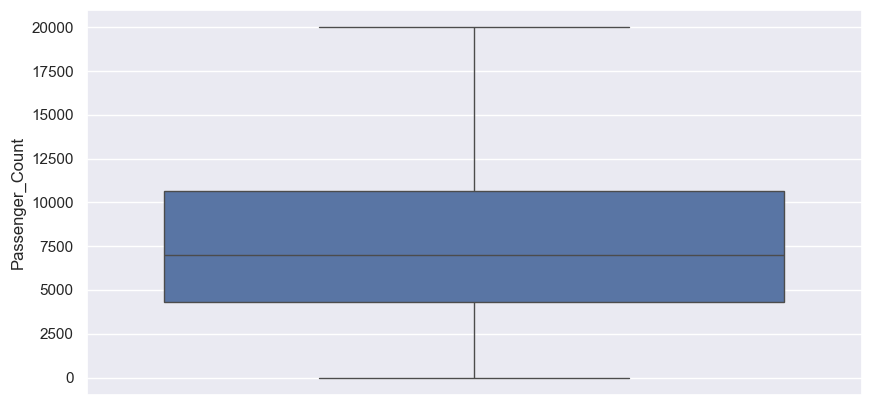

In [14]:
plt.figure(figsize = (10,5))
sns.boxplot(Airline['Passenger_Count'])

# 3. Exploratory Data Analysis (EDA):
  #    3.1. Univariate analysis.
 #     3.2. Bivariate analysis.


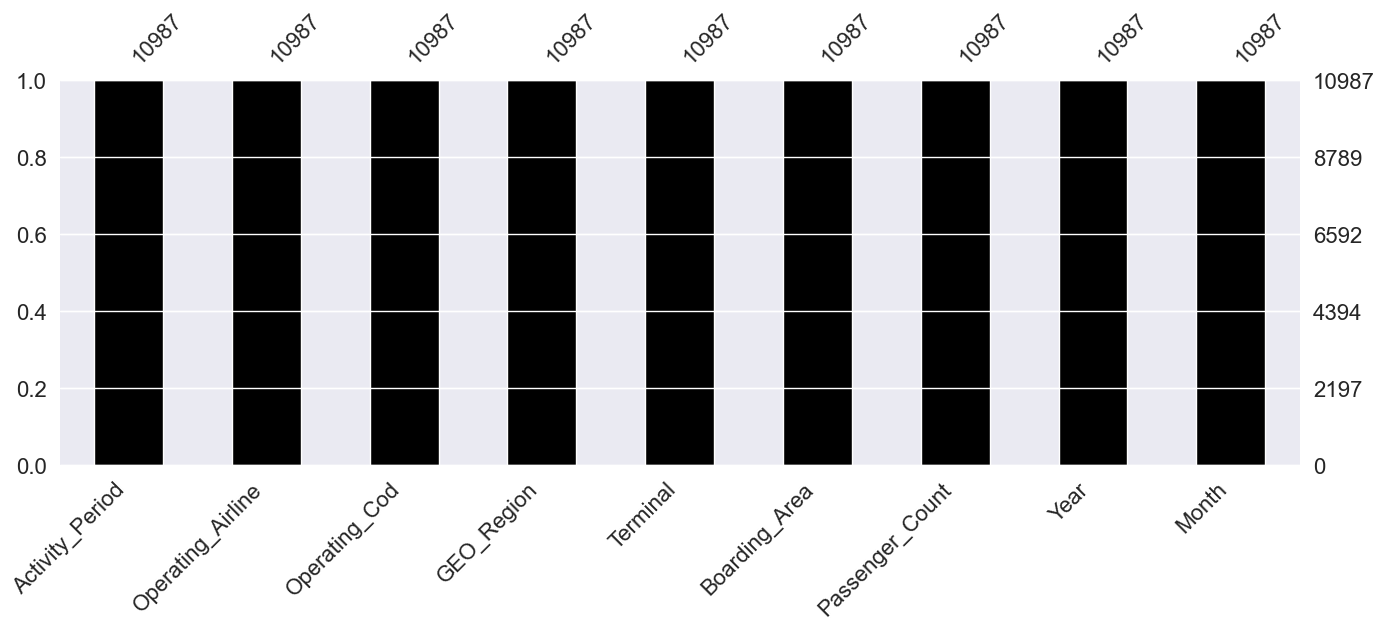

In [15]:
!pip install missingno 

import missingno as msno
msno.bar(Airline, figsize = (16,5),color = "black")
plt.show()

In [16]:
Airline.groupby("Operating_Airline")["Passenger_Count"].describe().T

Operating_Airline,ATA Airlines,Aer Lingus,Aeromexico,Air Berlin,Air Canada,Air Canada Jazz,Air China,Air France,Air India Limited,Air New Zealand,...,TACA,Turkish Airlines,United Airlines,United Airlines - Pre 07/01/2013,Virgin America,Virgin Atlantic,WestJet Airlines,World Airways,XL Airways France,Xtra Airways
count,38.000000,98.000000,179.000000,36.000000,234.000000,14.000000,259.000000,237.000000,8.000000,259.000000,...,258.000000,24.000000,385.000000,1353.000000,154.000000,258.000000,103.00000,3.000000,31.000000,1.0
mean,7211.131579,4407.183673,5492.882682,2320.750000,13406.769231,294.214286,6618.335907,10704.531646,2834.500000,7452.339768,...,5066.197674,8162.416667,7118.519481,6881.291205,4013.220779,9847.104651,5338.15534,261.666667,2223.161290,73.0
std,6838.893186,1589.142701,3708.751294,752.846346,4166.313728,123.746129,1484.532649,3594.167377,332.536572,1885.396251,...,1107.020808,1466.166694,6307.760422,5855.131229,2224.300787,2019.991756,2858.03326,8.326664,1146.148277,NaN
min,48.000000,612.000000,6.000000,972.000000,4915.000000,115.000000,49.000000,5374.000000,2258.000000,57.000000,...,2542.000000,3631.000000,1.000000,1.000000,103.000000,5695.000000,2.00000,255.000000,106.000000,73.0
25%,221.750000,3252.000000,2884.500000,1710.750000,10302.750000,225.250000,5578.000000,7504.000000,2753.750000,6115.500000,...,4274.750000,7985.250000,644.000000,636.000000,2862.750000,8457.000000,2023.50000,257.000000,1670.500000,73.0
50%,4913.500000,4224.000000,3459.000000,2277.500000,13350.000000,286.500000,6991.000000,10708.000000,2936.000000,7531.000000,...,4946.000000,8539.500000,6434.000000,6934.000000,3860.500000,9832.000000,6751.00000,259.000000,2436.000000,73.0
75%,12149.750000,5450.750000,9249.000000,2866.000000,17172.000000,328.750000,7490.500000,12828.000000,2984.250000,8737.500000,...,5585.750000,8900.500000,11383.000000,10903.000000,4913.500000,10798.750000,7733.00000,265.000000,2882.500000,73.0
max,19983.000000,8183.000000,14390.000000,3706.000000,19989.000000,554.000000,10316.000000,19937.000000,3258.000000,12973.000000,...,8970.000000,9813.000000,19939.000000,19984.000000,17355.000000,17879.000000,8795.00000,271.000000,4354.000000,73.0


In [17]:
passengers_per_year = Airline.groupby("Year")["Passenger_Count"].sum().reset_index()
passengers_per_year

,Year,Passenger_Count
0,2005,3578804
1,2006,7185926
2,2007,7845293
3,2008,7890970
4,2009,7802436
5,2010,8237129
6,2011,7943863
7,2012,7880572
8,2013,8097079
9,2014,8163718


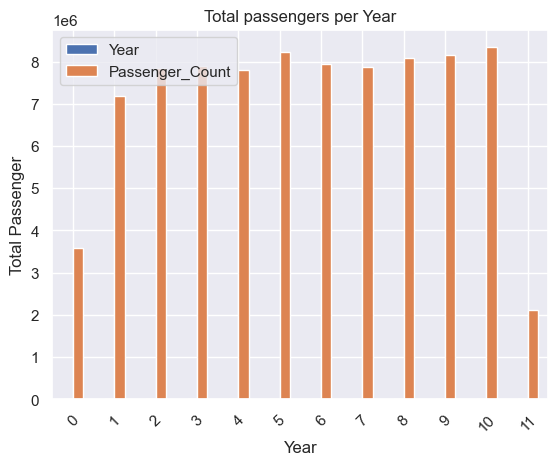

In [18]:
passengers_per_year.plot(kind="bar", xlabel="Year", ylabel="Total Passenger", title="Total passengers per Year")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

In [19]:
pivot_table = Airline.pivot_table(values='Passenger_Count', index='Year', columns=[ 'GEO_Region'], aggfunc='sum')
pivot_table

GEO_Region,Asia,Australia / Oceania,Canada,Central America,Europe,Mexico,Middle East,South America,US
Year,,,,,,,,,
2005,1149547.0,164991.0,355405.0,61994.0,554151.0,305087.0,NaN,NaN,987629.0
2006,2338754.0,453420.0,701455.0,111255.0,1225107.0,686118.0,NaN,NaN,1669817.0
2007,2435367.0,513077.0,759162.0,129652.0,1556103.0,636684.0,NaN,NaN,1815248.0
2008,2322650.0,489532.0,827475.0,100119.0,1611700.0,641005.0,2913.0,NaN,1895576.0
2009,2091024.0,478969.0,814122.0,107171.0,1594798.0,599886.0,138534.0,NaN,1977932.0
2010,2188140.0,455466.0,924752.0,114185.0,1700216.0,595388.0,211814.0,36471.0,2010697.0
2011,2137783.0,416924.0,1142068.0,125184.0,1667753.0,585198.0,216358.0,66758.0,1585837.0
2012,2363069.0,396782.0,1154068.0,130780.0,1563534.0,496855.0,226735.0,66453.0,1482296.0
2013,2580092.0,431219.0,1113997.0,129110.0,1709403.0,575586.0,223274.0,65412.0,1268986.0


In [20]:
col = list(Airline.columns)
col

['Activity_Period',
 'Operating_Airline',
 'Operating_Cod',
 'GEO_Region',
 'Terminal',
 'Boarding_Area',
 'Passenger_Count',
 'Year',
 'Month']

In [21]:
col1 = ['Passenger_Count','Year']

C:\Users\hp\AppData\Local\Temp\ipykernel_20236\3748726187.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Airline[i])
C:\Users\hp\AppData\Local\Temp\ipykernel_20236\3748726187.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Airline[i])


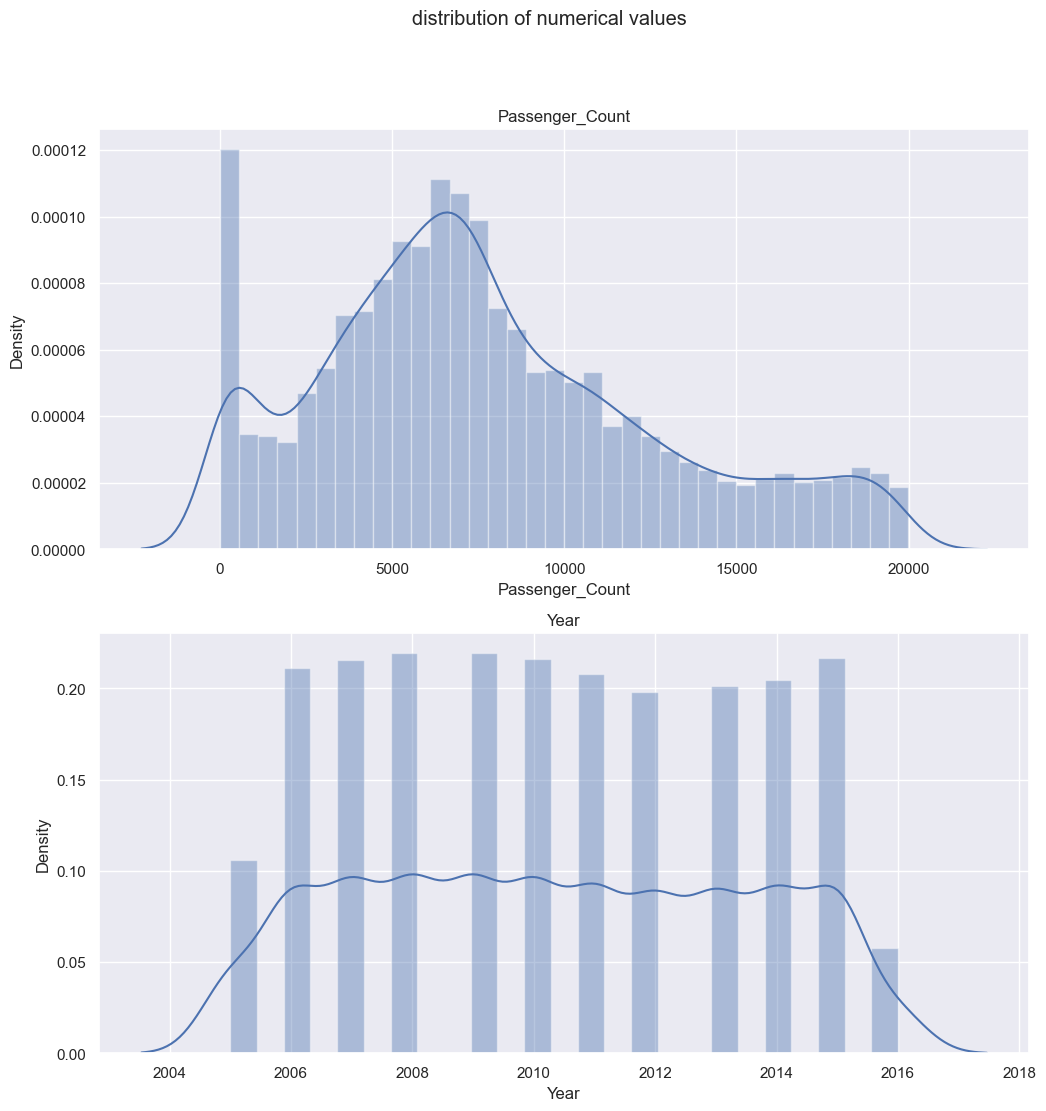

In [22]:
k=1
plt.figure(figsize=(12,12))
plt.tight_layout()
plt.suptitle("distribution of numerical values")


for i in Airline.loc[:,col1]:
    plt.subplot(2,1,k)   
    sns.distplot(Airline[i])
    plt.title(i)
    k+=1

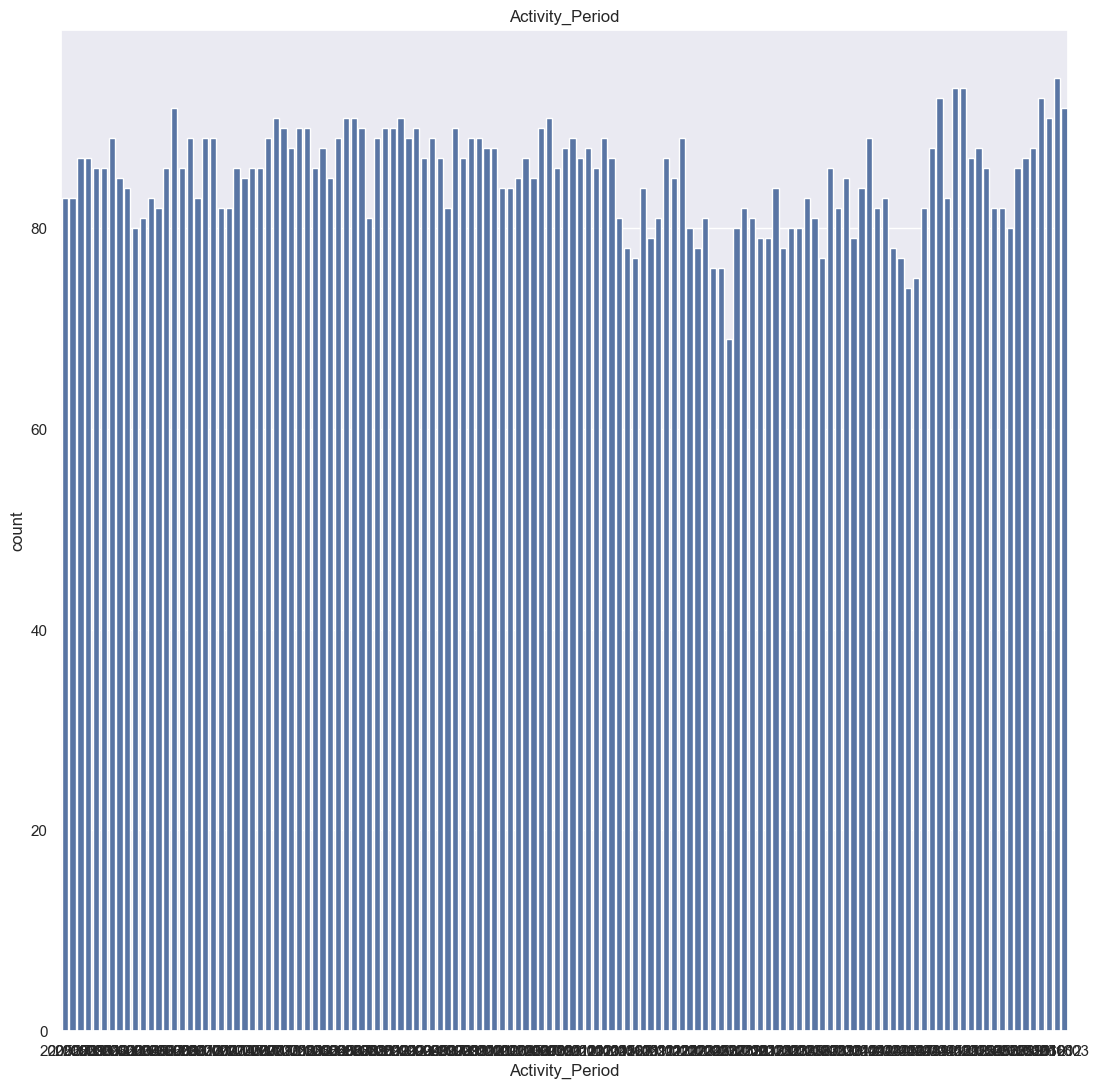

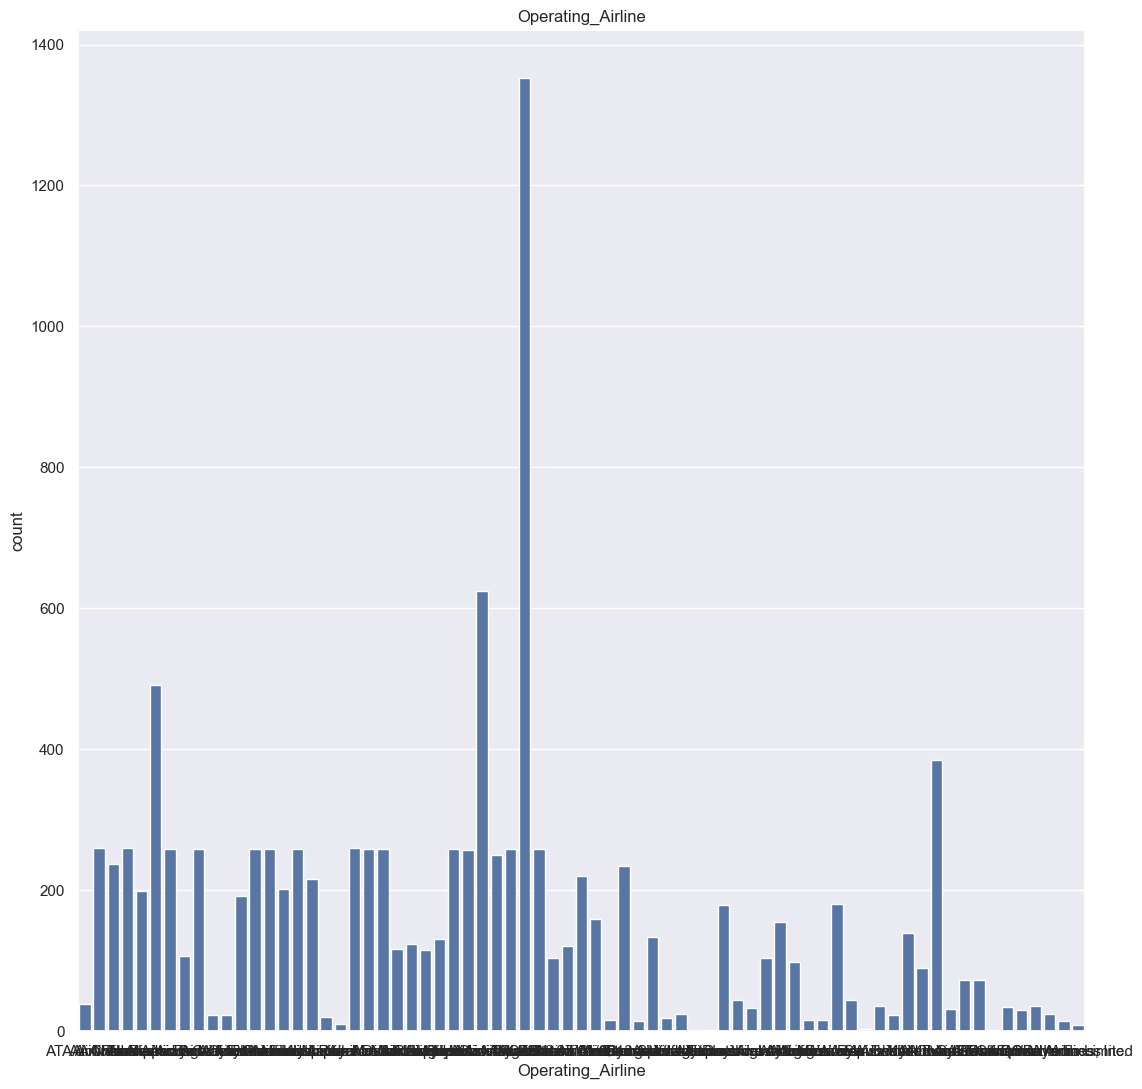

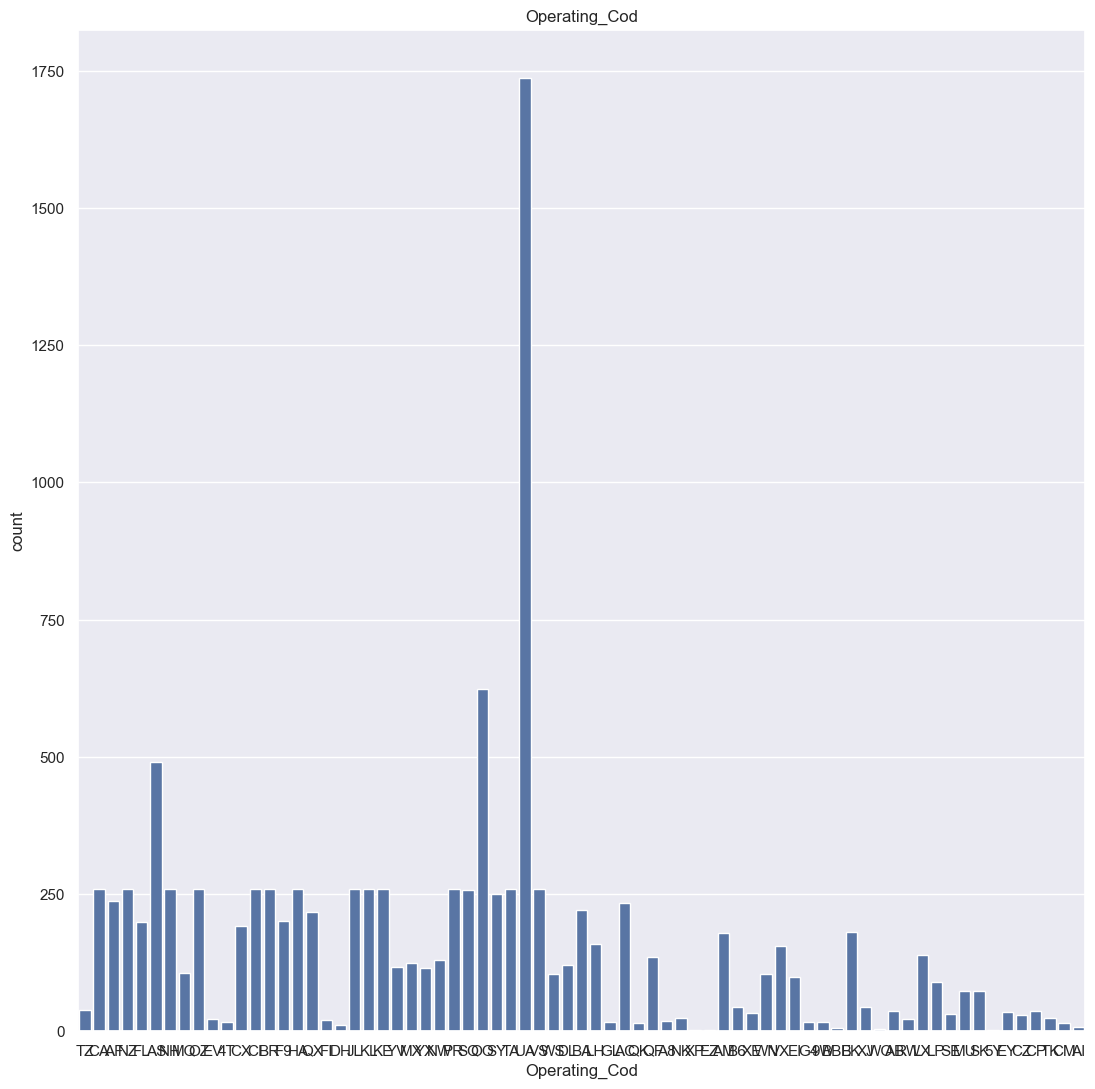

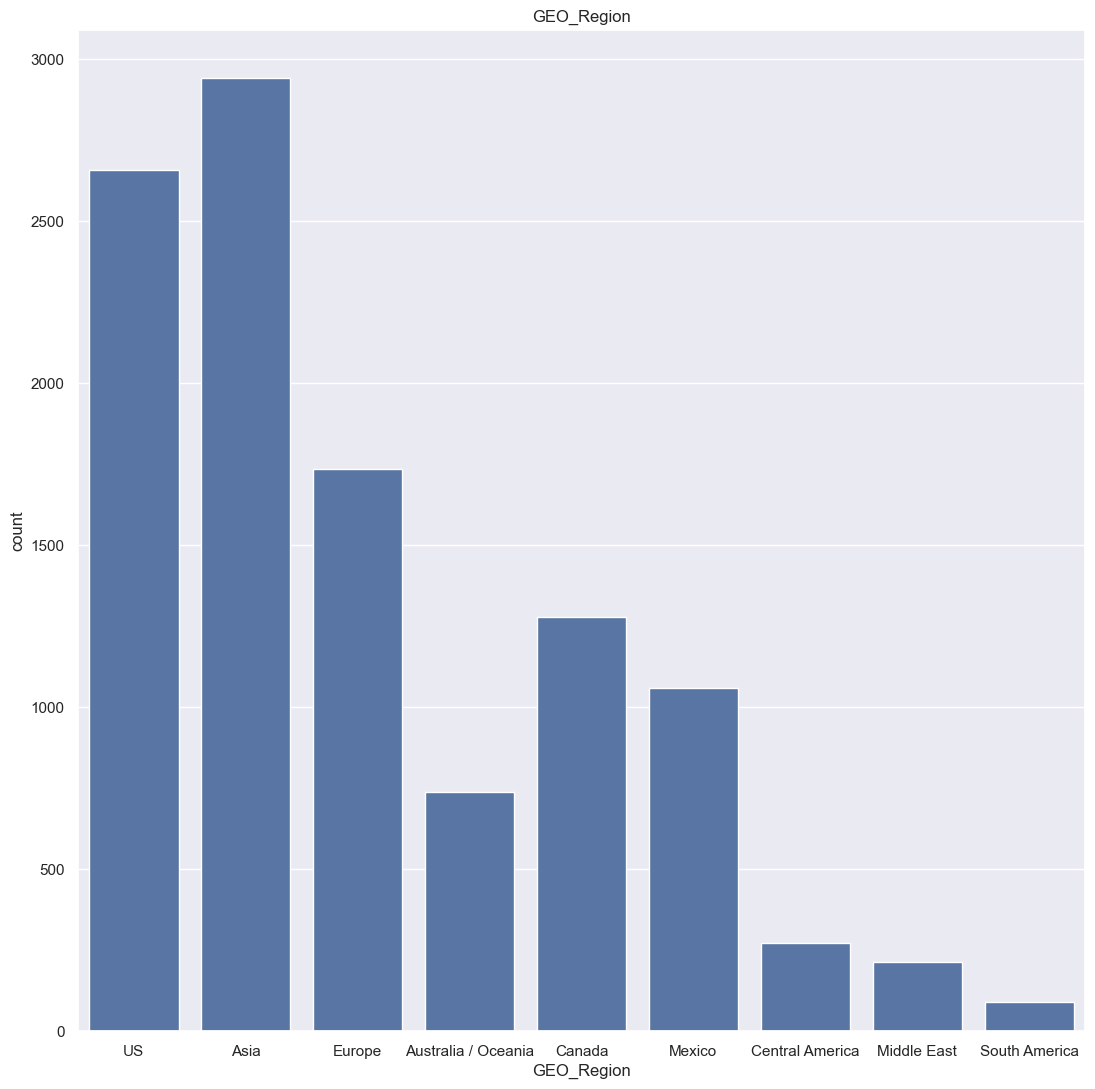

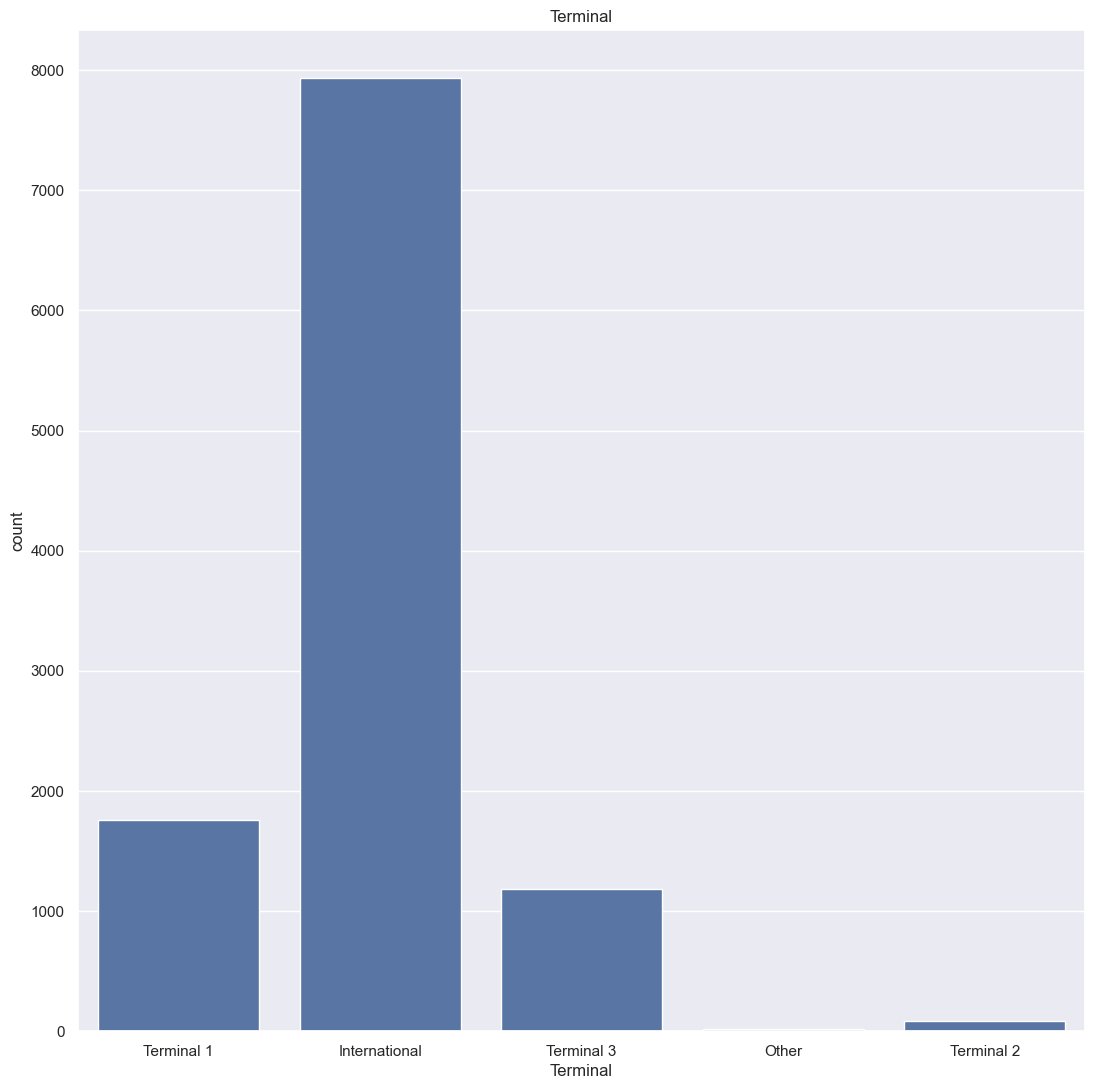

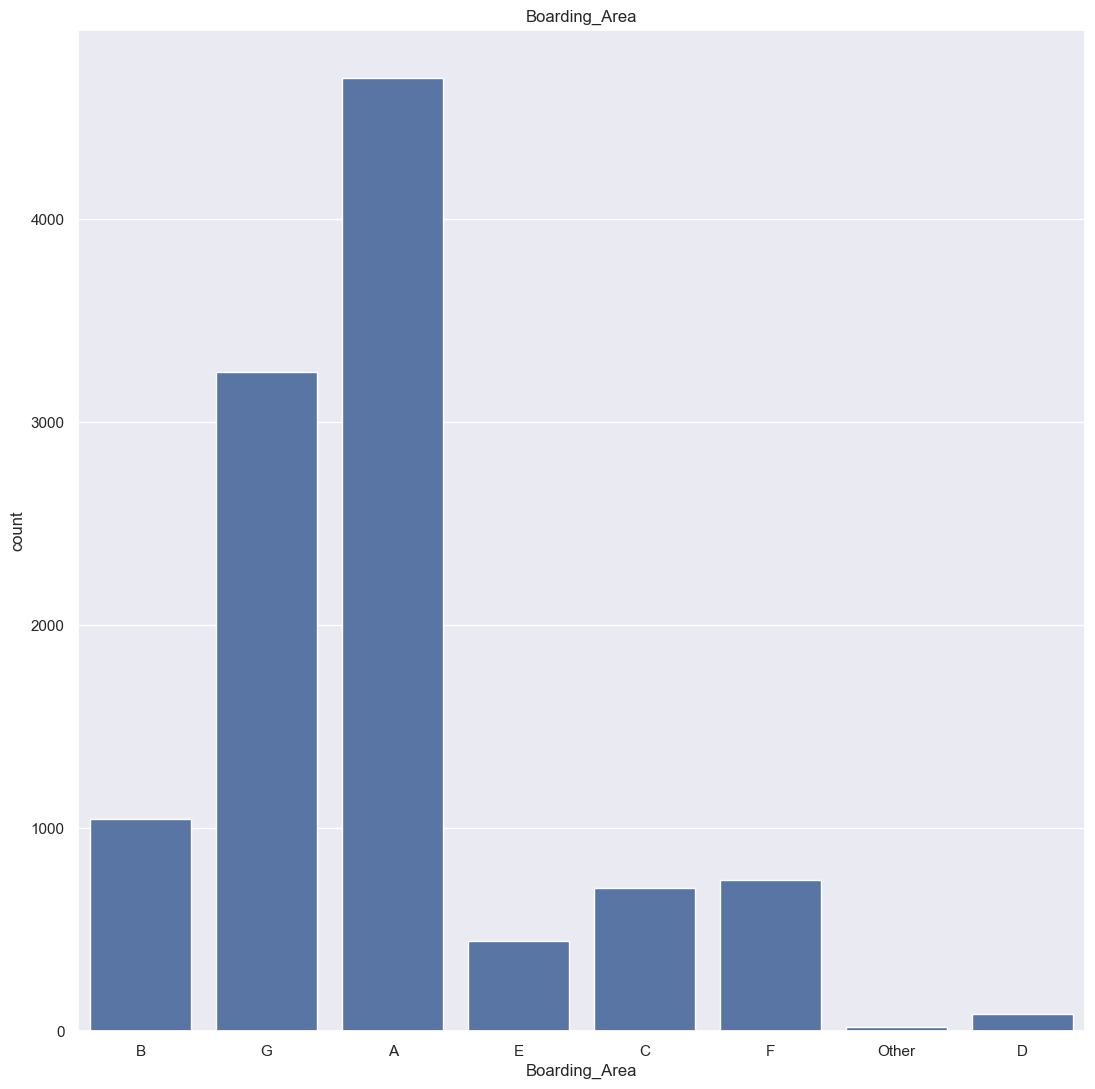

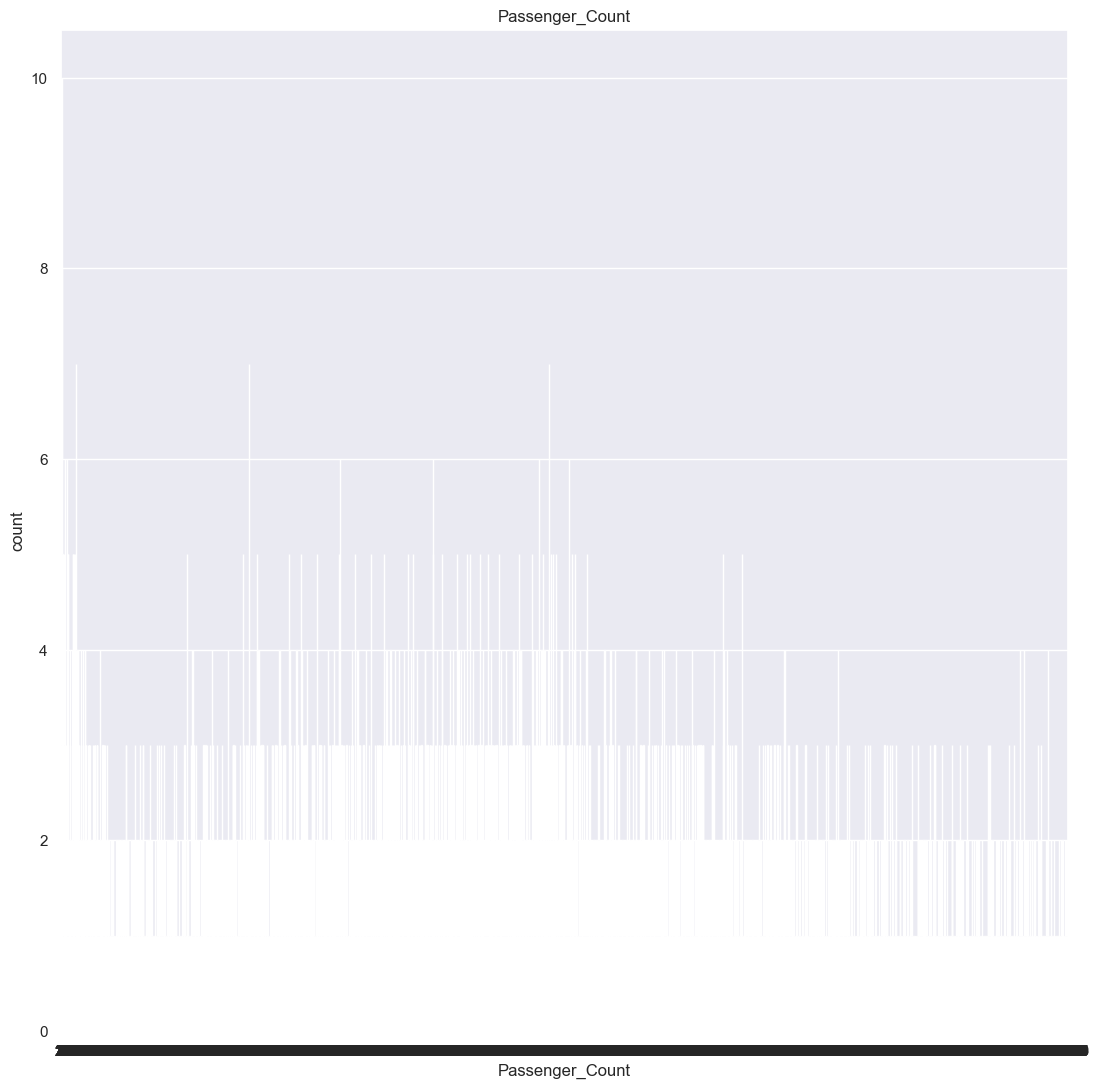

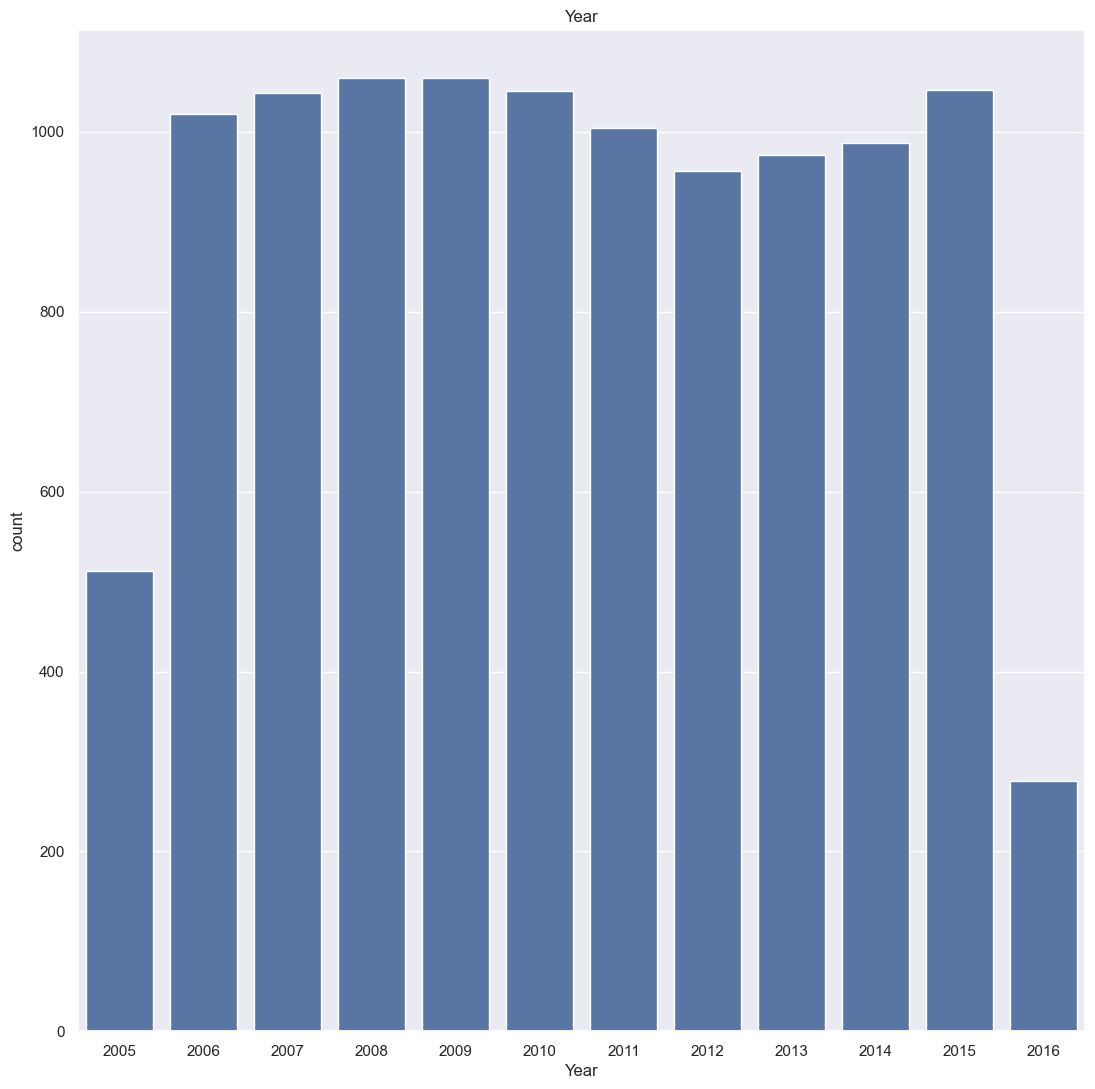

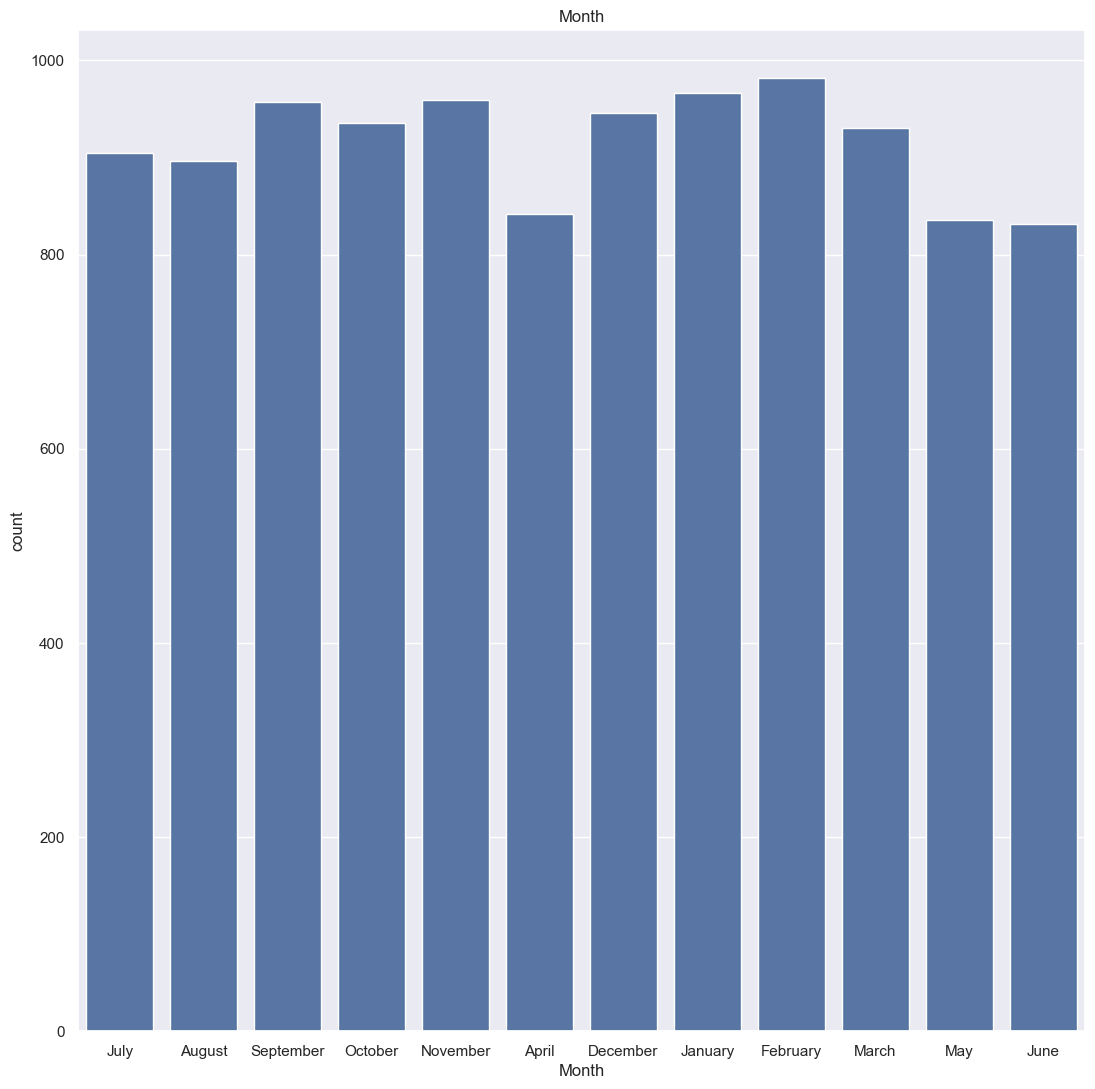

In [23]:
for i in col:
    
    plt.figure(figsize=(13,13))
    sns.countplot(x=i,data=Airline.loc[:,col])
    plt.title(i)

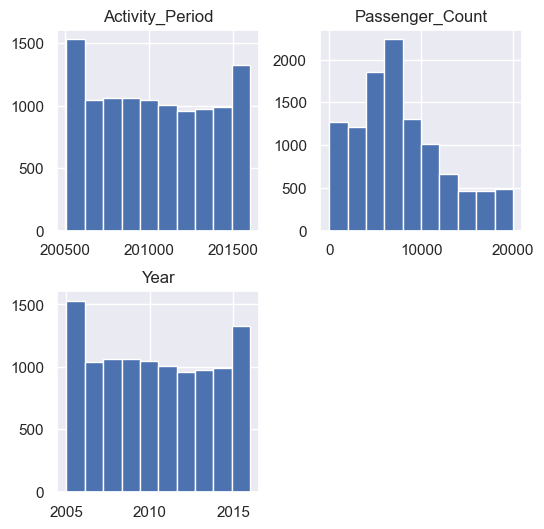

In [24]:
Airline.hist(figsize=(6,6));

<Axes: xlabel='Terminal', ylabel='Passenger_Count'>

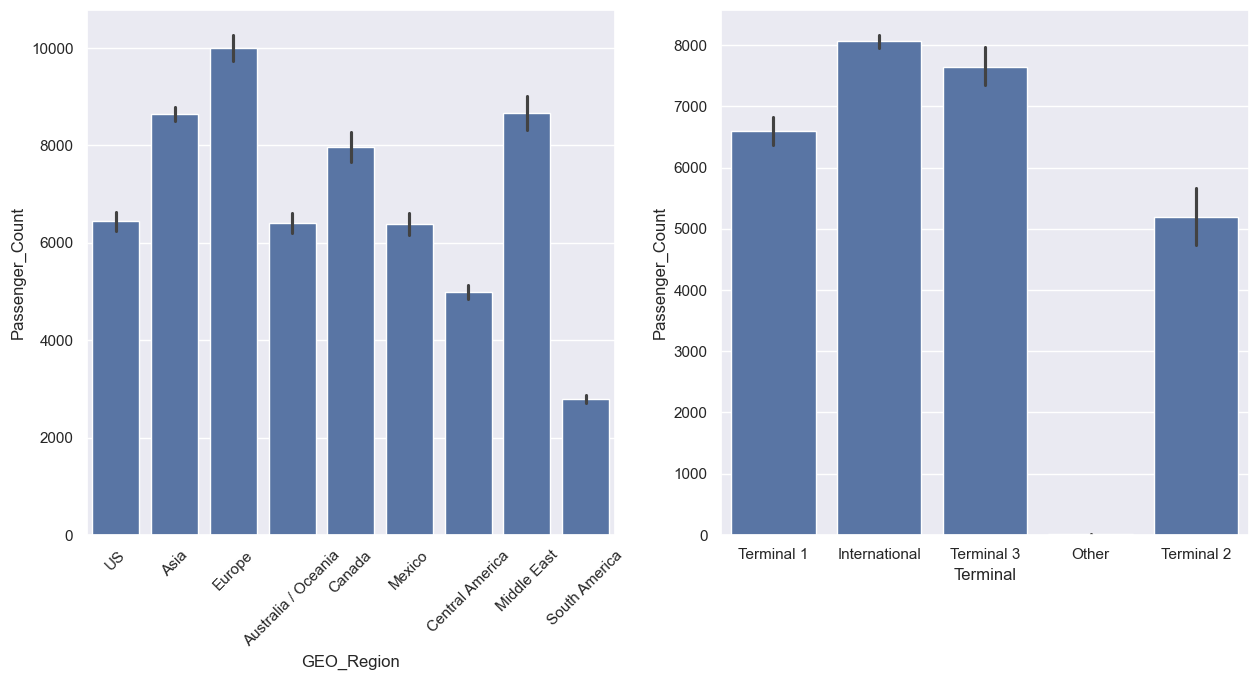

In [25]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.barplot(x="GEO_Region",y="Passenger_Count",data=Airline)
plt.xticks(rotation=45)
plt.subplot(2,2,2)
sns.barplot(x="Terminal",y="Passenger_Count",data=Airline)

## Hierchical Clustering

In [26]:
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

In [28]:
Airline["Activity_Period"]=le.fit_transform(Airline["Activity_Period"])
Airline["Operating_Airline"]=le.fit_transform(Airline["Operating_Airline"])
Airline["GEO_Region"]=le.fit_transform(Airline["GEO_Region"])
Airline["Operating_Cod"]=le.fit_transform(Airline["Operating_Cod"])
Airline["Terminal"]=le.fit_transform(Airline["Terminal"])
Airline["Boarding_Area"]=le.fit_transform(Airline["Boarding_Area"])
Airline["Month"]=le.fit_transform(Airline["Month"])

In [29]:
Airline.head()

,Activity_Period,Operating_Airline,Operating_Cod,GEO_Region,Terminal,Boarding_Area,Passenger_Count,Year,Month
2,0,0,59,8,2,1,5415,2005,5
5,0,6,14,0,0,6,6263,2005,5
6,0,6,14,0,0,6,5500,2005,5
7,0,7,6,4,0,0,12050,2005,5
8,0,7,6,4,0,0,11638,2005,5


In [33]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# from AutoClean import AutoClean

In [34]:
Airline.columns

Index(['Activity_Period', 'Operating_Airline', 'Operating_Cod', 'GEO_Region',
       'Terminal', 'Boarding_Area', 'Passenger_Count', 'Year', 'Month'],
      dtype='object')

In [37]:
Airline1 = Airline.drop(['Activity_Period', 'Operating_Airline', 'Operating_Cod', 'GEO_Region',
       'Terminal', 'Boarding_Area', 'Passenger_Count', 'Year', 'Month'],axis = 1)

In [41]:
Airline_iloc = Airline.iloc[:,5:7]
Airline_iloc

,Boarding_Area,Passenger_Count
2,1,5415
5,6,6263
6,6,5500
7,0,12050
8,0,11638
...,...,...
15000,5,17521
15003,0,4189
15004,3,4693
15005,0,12313


In [42]:
Airline_pipe = make_pipeline(StandardScaler())
Airline_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [43]:
Std_Airline = pd.DataFrame(Airline_pipe.fit_transform(Airline_iloc),columns=Airline_iloc.columns)
Std_Airline.head()

,Boarding_Area,Passenger_Count
0,-0.576474,-0.475605
1,1.302855,-0.302366
2,1.302855,-0.458240
3,-0.952339,0.879868
4,-0.952339,0.795700


(array([     5,     15,     25, ..., 109845, 109855, 109865]),
 [Text(5, 0, '2178'),
  Text(15, 0, '10343'),
  Text(25, 0, '2008'),
  Text(35, 0, '2177'),
  Text(45, 0, '2009'),
  Text(55, 0, '10429'),
  Text(65, 0, '10260'),
  Text(75, 0, '2095'),
  Text(85, 0, '2096'),
  Text(95, 0, '3811'),
  Text(105, 0, '2657'),
  Text(115, 0, '7771'),
  Text(125, 0, '677'),
  Text(135, 0, '5798'),
  Text(145, 0, '3355'),
  Text(155, 0, '3721'),
  Text(165, 0, '5888'),
  Text(175, 0, '3615'),
  Text(185, 0, '3886'),
  Text(195, 0, '4234'),
  Text(205, 0, '7066'),
  Text(215, 0, '3172'),
  Text(225, 0, '4318'),
  Text(235, 0, '4407'),
  Text(245, 0, '4495'),
  Text(255, 0, '10891'),
  Text(265, 0, '3438'),
  Text(275, 0, '7854'),
  Text(285, 0, '10680'),
  Text(295, 0, '6629'),
  Text(305, 0, '6904'),
  Text(315, 0, '4672'),
  Text(325, 0, '4777'),
  Text(335, 0, '9998'),
  Text(345, 0, '3990'),
  Text(355, 0, '4760'),
  Text(365, 0, '4061'),
  Text(375, 0, '5624'),
  Text(385, 0, '6732'),
  Text(3

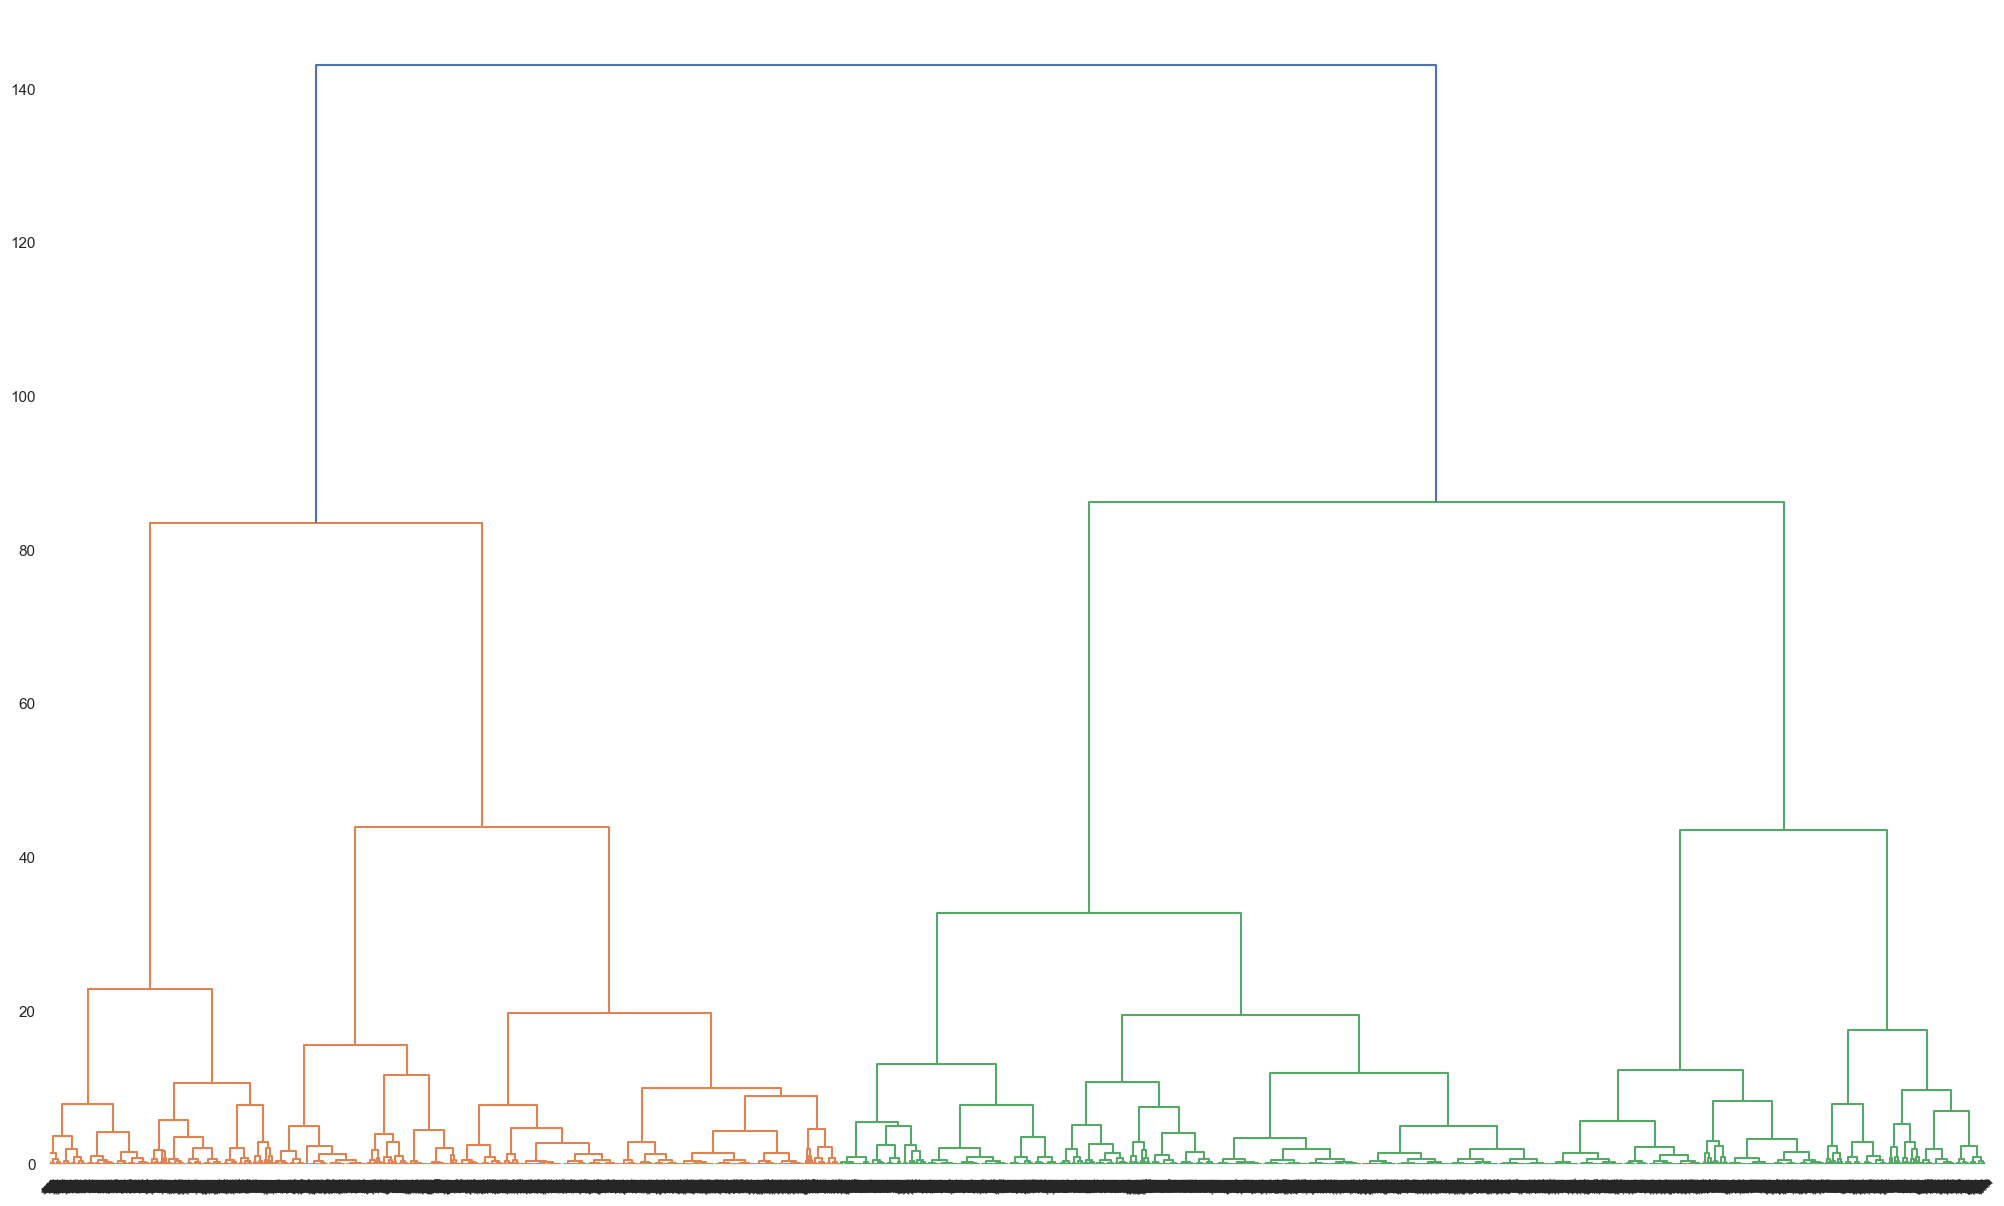

In [44]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(25,15))
plot = dendrogram(linkage(Std_Airline,method="ward"))
plt.xticks(rotation = 45)

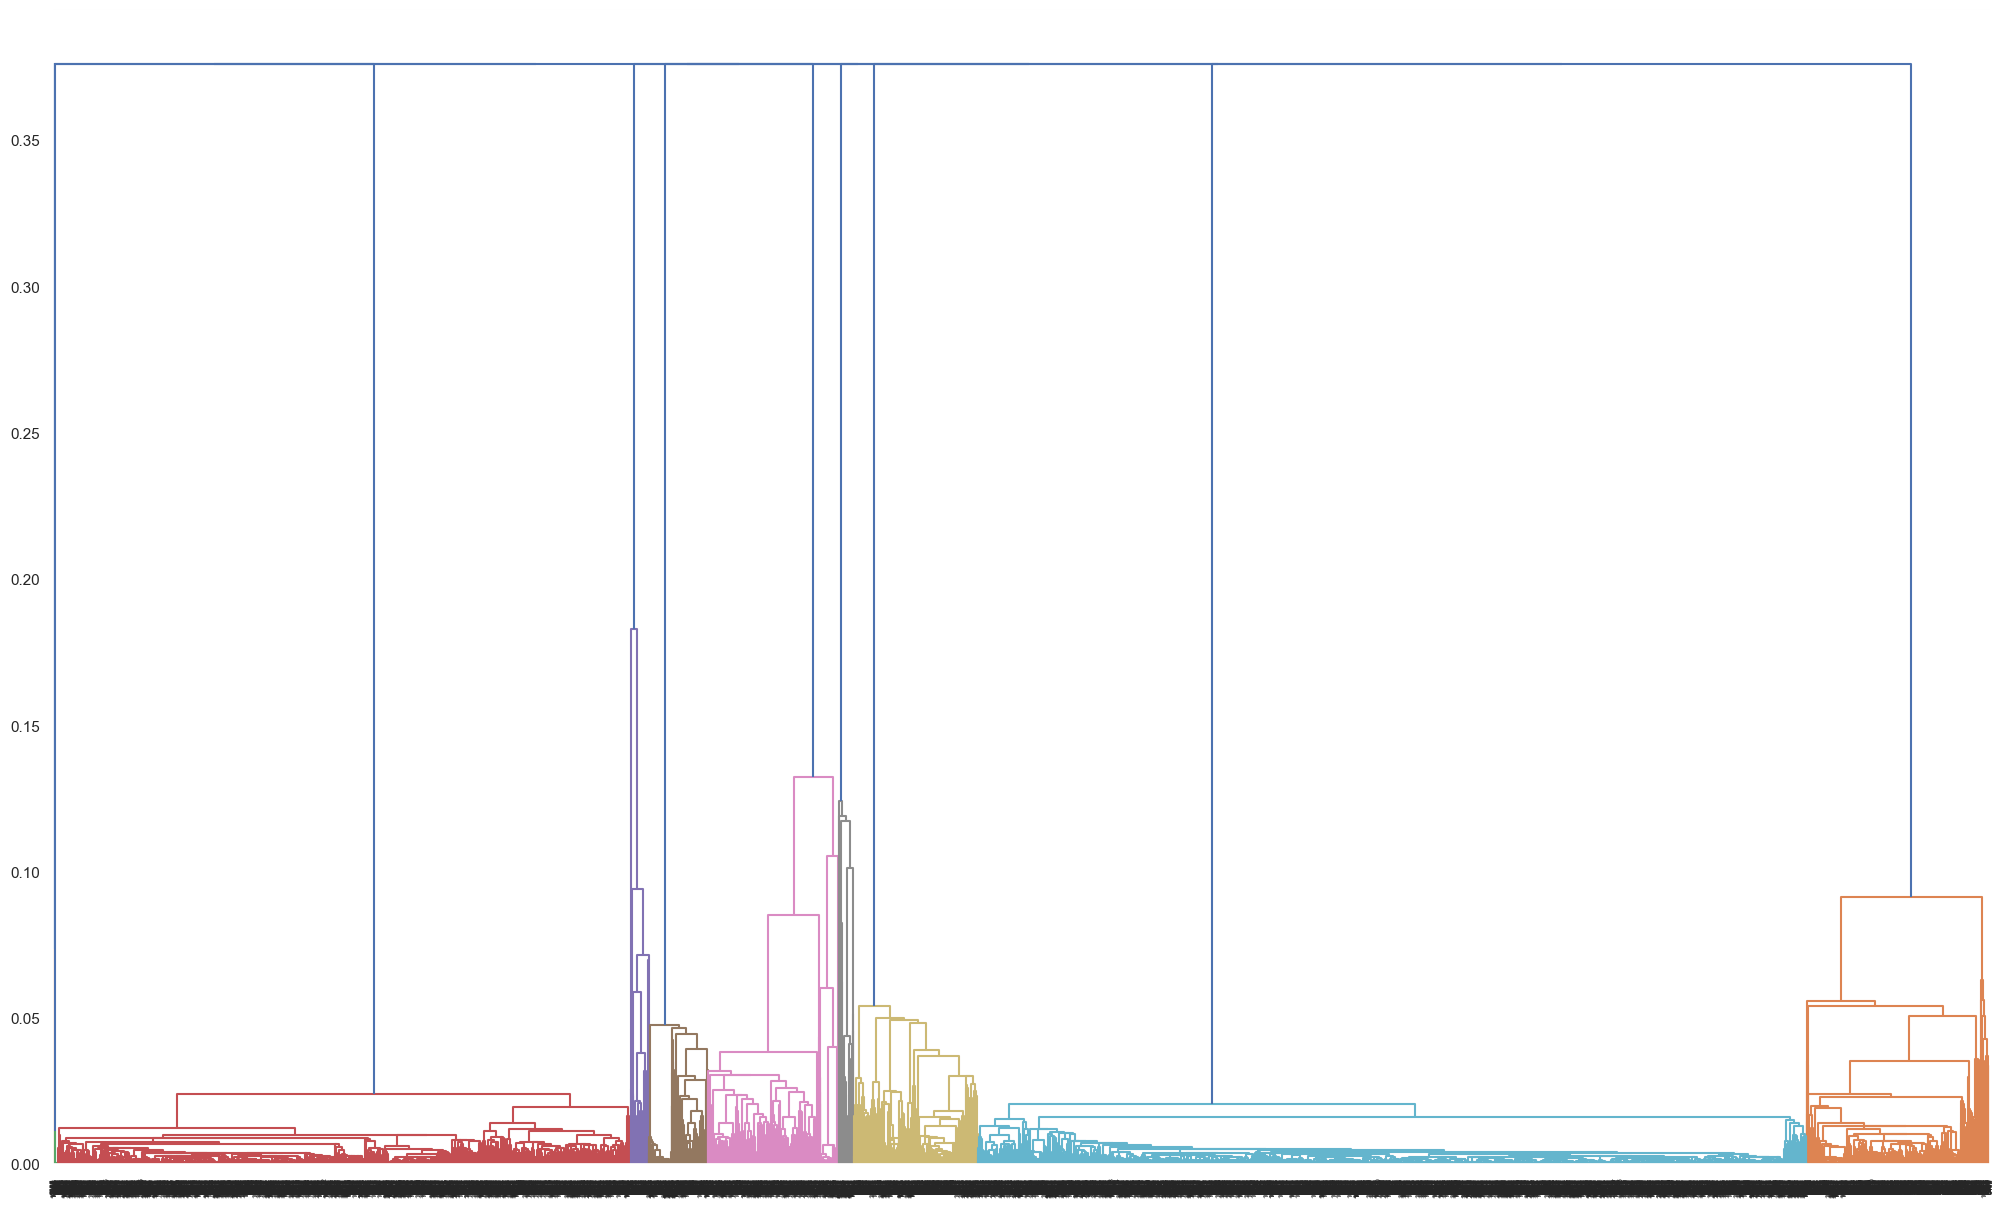

In [45]:
plt.figure(figsize=(25,15))
plot = dendrogram(linkage(Std_Airline,method="single",metric = "euclidean"))

In [46]:
from sklearn.cluster import AgglomerativeClustering

Aglomoretive = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
Aglomoretive_airline = Aglomoretive.fit_predict(Std_Airline)

Aglomoretive.labels_

array([0, 2, 2, ..., 2, 0, 0], dtype=int64)

In [47]:
cluster_labels = pd.Series(Aglomoretive.labels_)
cluster_labels.head()

0    0
1    2
2    2
3    0
4    0
dtype: int64

In [48]:
df_clust = pd.concat([cluster_labels,Airline],axis = 1)
df_clust.rename(columns={0:'clust'},inplace=True)

df_clust.head()

,clust,Activity_Period,Operating_Airline,Operating_Cod,GEO_Region,Terminal,Boarding_Area,Passenger_Count,Year,Month
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0.0,0.0,59.0,8.0,2.0,1.0,5415.0,2005.0,5.0
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
